In [1]:
import pandas as pd
import georinex as gr
import misc
from plots import *
import copy

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader

# Prepare the data

In [2]:
# Load log files
measurements_log = ['Raw', 'Fix']
measurements_RINEX = sum([[f"{y}{x}" for y in ['C', 'L', 'D', 'S']] for x in ['1C', '5Q', '2I', '5P']], [])
# measurements_RINEX = ['L1C', 'L5Q']
# # 'C1C', 'C5Q', 'C2I', 'C5P'

logs = []

device_folder = "../.data/2023_Dataset_Hervanta/S4_dynamic_lake/raw"
reference_folder = "../.data/2023_Dataset_Hervanta/S4_dynamic_lake/_reference/rover"

rinex_ref = RinexReader('Reference', 
            filepath=f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.23O",
            tlim=[], meas=measurements_RINEX, sampling=1)

log = LogReader(manufacturer="Google", device="Pixel 7", acronym='GP7', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixel7_20230811150244.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Google", device="Pixel Watch", acronym='GPW', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_GooglePixelWatch_20230811150346.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="OnePlus", device="Nord 2", acronym='ON2', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_OnePlusNord2_20230811150159.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Samsung", device="A52", acronym='A52', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_SamsungA52_20230811150240.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

log = LogReader(manufacturer="Xiaomi", device="11T", acronym='X11', specifiedTags=measurements_log, mode="mimir", 
                filepath=f"{device_folder}/log_Xiaomi11_20230811150208.txt")
log.ref = rinex_ref
log.pos = PosReader(f"{reference_folder}/NMND17420010S_2023-08-11_12-31-17.pos")
logs.append(log)

device_list = [log.device for log in logs]

In [3]:
# Output folder
output = '../.output/S4'

In [4]:
log.raw.loc[log.raw['prn'].isin(['C20-L5']), ['CarrierFrequencyHz']]


,CarrierFrequencyHz
datetime,
2023-08-11 12:02:11.711,1.176450e+09
2023-08-11 12:02:12.199,1.176450e+09
2023-08-11 12:02:14.236,1.176450e+09
2023-08-11 12:02:15.687,1.176450e+09
2023-08-11 12:02:17.666,1.176450e+09
...,...
2023-08-11 12:30:17.695,1.176450e+09
2023-08-11 12:30:18.664,1.176450e+09
2023-08-11 12:30:21.696,1.176450e+09


In [5]:
log.pos.df

,provider,timestamp,latitude,longitude,altitude
datetime,,,,,
2023-08-11 12:02:51,REF,1.691755e+09,61.449225,23.856265,163.0054
2023-08-11 12:02:52,REF,1.691755e+09,61.449225,23.856266,163.0078
2023-08-11 12:02:53,REF,1.691755e+09,61.449225,23.856266,163.0047
2023-08-11 12:02:54,REF,1.691755e+09,61.449224,23.856266,163.0140
2023-08-11 12:02:55,REF,1.691755e+09,61.449224,23.856266,163.0222
...,...,...,...,...,...
2023-08-11 12:31:13,REF,1.691757e+09,61.449228,23.856277,163.3463
2023-08-11 12:31:14,REF,1.691757e+09,61.449221,23.856276,163.0440
2023-08-11 12:31:15,REF,1.691757e+09,61.449224,23.856277,162.9784


In [6]:
log.ref.df

,time,sv,signal,doppler,phase,pseudorange,snr,prn,system,frequency,pseudorange_rate,pseudorange_error,phase_rate,phase_error,doppler_error
0,2023-08-11 12:03:09,C05,2I,-40.322,2.086701e+08,4.007290e+07,40.839,C05-L1,C,L1,NaN,NaN,NaN,NaN,NaN
1,2023-08-11 12:03:09,C06,2I,11.604,1.943435e+08,3.732162e+07,46.821,C06-L1,C,L1,NaN,NaN,NaN,NaN,NaN
2,2023-08-11 12:03:09,C09,2I,579.245,1.956172e+08,3.756622e+07,47.068,C09-L1,C,L1,NaN,NaN,NaN,NaN,NaN
3,2023-08-11 12:03:09,C16,2I,-141.250,1.970614e+08,3.784356e+07,48.602,C16-L1,C,L1,NaN,NaN,NaN,NaN,NaN
4,2023-08-11 12:03:09,C20,2I,2866.198,1.244677e+08,2.390271e+07,51.394,C20-L1,C,L1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82889,2023-08-11 12:31:35,R09,1C,3472.252,1.214006e+08,2.273451e+07,44.560,R09-L1,R,L1,-650.322,0.054,-3472.639,0.313,-0.571
82890,2023-08-11 12:31:35,R16,1C,-10.864,1.162980e+08,2.177130e+07,50.563,R16-L1,R,L1,1.913,0.252,10.220,1.401,-1.184
82891,2023-08-11 12:31:35,R22,1C,-4568.948,1.228974e+08,2.302290e+07,38.385,R22-L1,R,L1,855.813,-0.203,4568.497,-0.961,-1.018
82892,2023-08-11 12:31:35,R23,1C,-1753.994,1.065630e+08,1.992090e+07,46.564,R23-L1,R,L1,327.751,0.016,1753.280,0.097,-1.370


In [7]:
# only keep GPS provider
log.fix = log.fix.loc[log.fix["provider"] == 'GPS']

In [8]:
# Compute ENU errors
ref_enu = [61.44922404, 23.8562781, 162.711]
stats=[]
for log in logs:
    # Convert to ENU based on reference
    log.fix[["east", "north", "up"]] = log.fix.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # window = 1
    # log.pos.df["latitude_avg"] = log.pos.df["latitude"].rolling(window).mean()
    # log.pos.df["longitude_avg"] = log.pos.df["longitude"].rolling(window).mean()
    # log.pos.df["altitude_avg"] = log.pos.df["altitude"].rolling(window).mean()

    log.pos.df[["east", "north", "up"]] = log.pos.df.apply(
        lambda row: misc.convert2ENU(row['latitude'], row['longitude'], row['altitude'], ref_enu), 
        axis='columns', result_type='expand')

    # Align/interpolates dataframes
    pos_A, pos_B = log.fix[["provider", "east", "north", "up"]].align(log.pos.df[["east", "north", "up"]])
    log.diff = pos_B.interpolate(method='time') - pos_A.interpolate(method='time')
    log.diff.dropna(how='all', inplace=True)
    
    log.diff[["2D_error"]] = log.diff.apply(
        lambda row: misc.getHorizontalError(row['east'], row['north']), 
        axis='columns', result_type='expand')
    
    log.diff[["3D_error"]] = log.diff.apply(
        lambda row: misc.get3DError(row['east'], row['north'], row['up']), 
        axis='columns', result_type='expand')
    
    log.diff['provider'] = log.diff['provider'].fillna('GPS')
    log.diff = log.diff[['provider', "east", "north", "up", '2D_error', '3D_error']]

    df = log.diff[["east", "north", "up", '2D_error', '3D_error']].dropna().describe(percentiles=[0.5])
    stats.append(df.T[['mean', 'std']])

    # Compute RMSE 
    df_pos = log.diff[["east", "north", "up", '2D_error', '3D_error']].dropna()
    rmse_2d = np.sqrt(np.mean(df_pos['east']**2 + df_pos['north']**2))
    rmse_3d = np.sqrt(np.mean(df_pos['east']**2 + df_pos['north']**2 + df_pos['up']**2))
    print(f"2D RMSE {rmse_2d:.3f}, 3D RMSE {rmse_3d:.3f}")
stats = pd.concat(stats, keys=device_list, axis=1).T.applymap(lambda x: f"{x:0.3f}")
stats

2D RMSE 3.069, 3D RMSE 4.390
2D RMSE 3.244, 3D RMSE 4.344
2D RMSE 5.228, 3D RMSE 9.905
2D RMSE 316.410, 3D RMSE 316.592
2D RMSE 6.078, 3D RMSE 8.394


east   north      up 2D_error 3D_error
Pixel 7     mean   -0.600   1.734  -2.449    2.665    3.982
            std     1.741   1.738   1.964    1.521    1.847
Pixel Watch mean    0.166   0.881  -1.709    2.785    3.718
            std     2.286   2.121   2.330    1.663    2.246
Nord 2      mean    0.180   1.829  -7.407    4.213    8.848
            std     2.241   4.352   3.991    3.097    4.454
A52         mean  154.769  46.289  -1.942  187.800  189.237
            std   265.957  57.708  10.547  254.726  253.886
11T         mean    0.593   3.145  -4.926    5.062    7.628
            std     3.188   4.068   3.044    3.365    3.505

In [9]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{lllll}
\toprule
   east &  north &     up & 2D\_error & 3D\_error \\
\midrule
 -0.600 &  1.734 & -2.449 &    2.665 &    3.982 \\
  1.741 &  1.738 &  1.964 &    1.521 &    1.847 \\
  0.166 &  0.881 & -1.709 &    2.785 &    3.718 \\
  2.286 &  2.121 &  2.330 &    1.663 &    2.246 \\
  0.180 &  1.829 & -7.407 &    4.213 &    8.848 \\
  2.241 &  4.352 &  3.991 &    3.097 &    4.454 \\
154.769 & 46.289 & -1.942 &  187.800 &  189.237 \\
265.957 & 57.708 & 10.547 &  254.726 &  253.886 \\
  0.593 &  3.145 & -4.926 &    5.062 &    7.628 \\
  3.188 &  4.068 &  3.044 &    3.365 &    3.505 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


In [10]:
log.diff

,provider,east,north,up,2D_error,3D_error
datetime,,,,,,
2023-08-11 12:02:51,GPS,-0.441680,1.297713,-4.894600,1.370817,5.082937
2023-08-11 12:02:52,GPS,-0.409514,1.252803,-4.892200,1.318035,5.066640
2023-08-11 12:02:53,GPS,-0.409141,1.250017,-4.895300,1.315271,5.068915
2023-08-11 12:02:54,GPS,-0.397832,1.224497,-4.886000,1.287503,5.052787
2023-08-11 12:02:55,GPS,-0.388017,1.203546,-4.877800,1.264548,5.039049
...,...,...,...,...,...,...
2023-08-11 12:31:13,GPS,-0.005014,5.301841,0.146302,5.301843,5.303861
2023-08-11 12:31:14,GPS,-0.028858,4.522545,-0.155998,4.522637,4.525327
2023-08-11 12:31:15,GPS,0.043048,4.919827,-0.221598,4.920015,4.925003


# Results

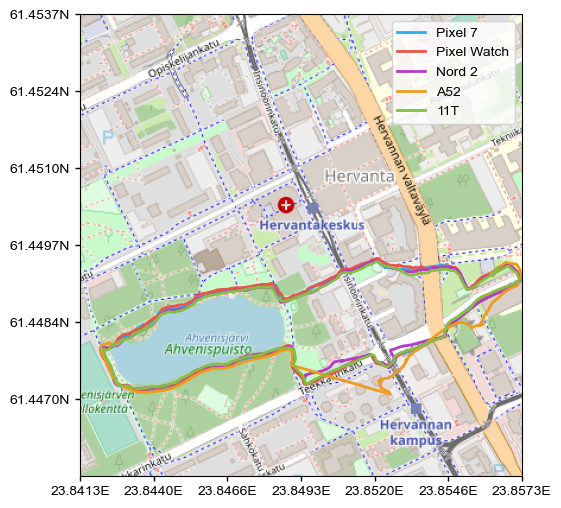

In [11]:
center = [61.4497, 23.8493]
extent = [center[1] - 0.008, center[1] + 0.008, center[0] - 0.004, center[0] + 0.004]
locations = {}
for log in logs:
    #locations['Reference'] = log.pos.df[["latitude", "longitude"]]
    locations[log.device] = log.fix.loc[log.fix['provider'].isin(['GPS']), ["latitude", "longitude"]]
plotMap(locations=locations, extent=extent, scale=15)

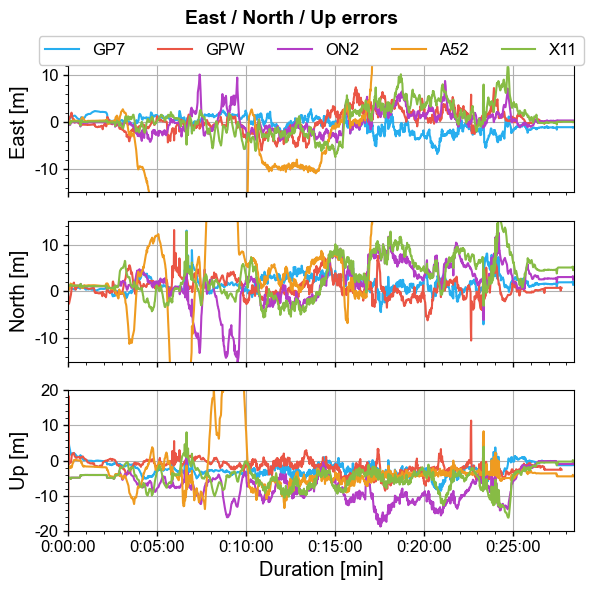

In [12]:
plotENU(logs, lim=[15,15,20], yticks=[2, 10, 2, 10, 2, 10], xticks=[60, 300], mode='difference', save=f"{output}/s4_enu")

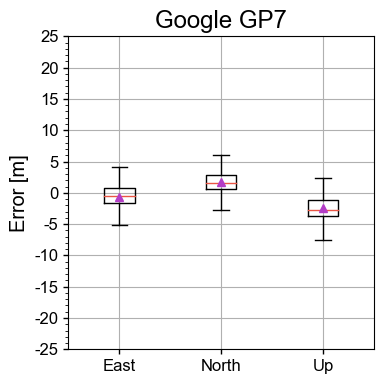

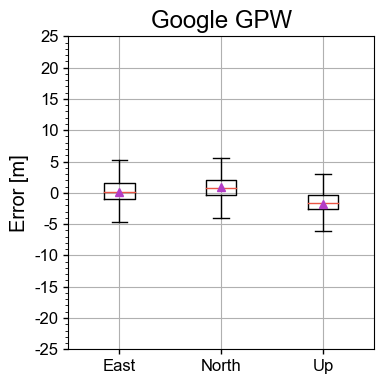

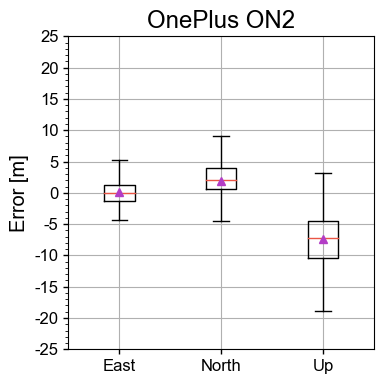

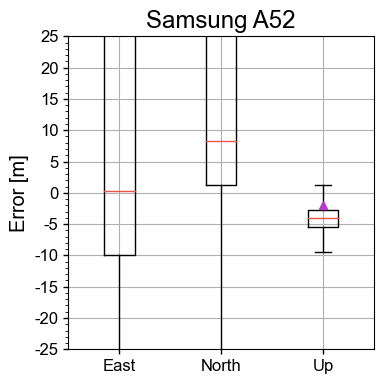

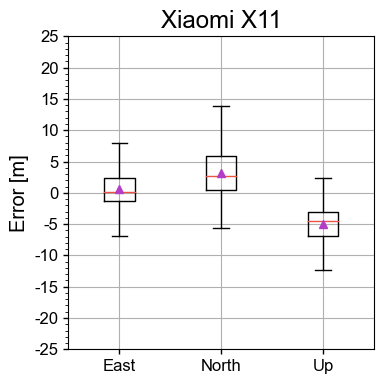

In [13]:
plotStatisticsENU(logs, mode='box', lim=25, ticks=[1, 5])

### Visibility

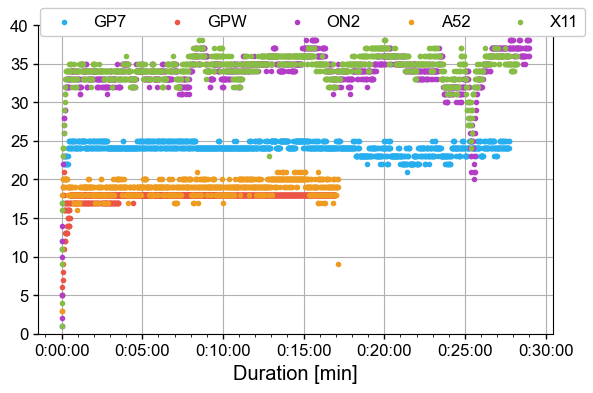

In [14]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 300], mode='signal', save=f"{output}/s4_signals_epoch")

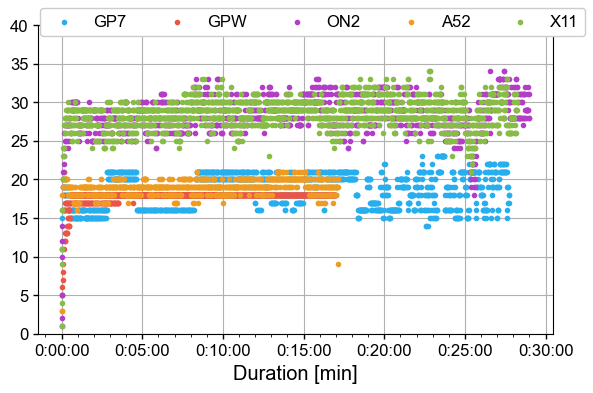

In [15]:
plotTotalSignalsPerEpochs(logs, lim=[0, 40], ticks=[60, 300], mode='satellite', save=f"{output}/s4_sats_epoch")

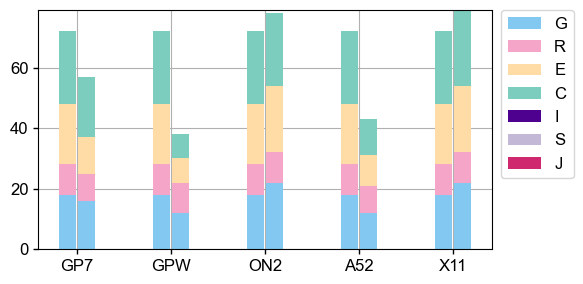

In [16]:
plotBarSignalsPerSystem(logs, save=f"{output}/s4_sats_bar")

In [17]:
df = statsSignalsPerSystem(logs, percent=True)
print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100
/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100


\begin{tabular}{lrrrrrrr}
\toprule
device &     G &     R &     E &     C &   I &   S &   J \\
\midrule
   GP7 &  88.9 &  90.0 &  60.0 &  83.3 & NaN & NaN & NaN \\
   GPW &  66.7 & 100.0 &  40.0 &  33.3 & NaN & NaN & NaN \\
   ON2 & 122.2 & 100.0 & 110.0 & 100.0 & NaN & NaN & NaN \\
   A52 &  66.7 &  90.0 &  50.0 &  50.0 & NaN & NaN & NaN \\
   X11 & 122.2 & 100.0 & 110.0 & 104.2 & NaN & NaN & NaN \\
\bottomrule
\end{tabular}



/mnt/d/Projects/AndroidGNSS/MimirAnalyzer/jupyter/plots.py:603: RuntimeWarning: invalid value encountered in divide
  df_stats[f"{sys}"] = np.array(_bars_dev) / np.array(_bars_ref) * 100
/tmp/ipykernel_7687/133727591.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))


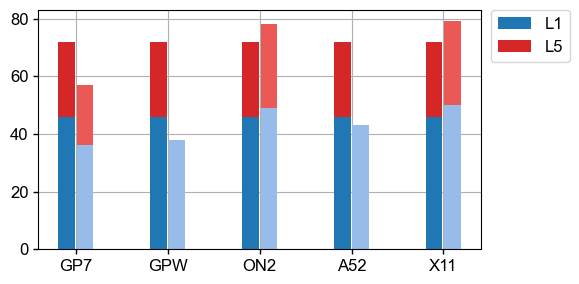

In [18]:
plotBarSignalsPerFrequency(logs, save=f"{output}/s4_freq_bar")

In [19]:
df = statsSignalsPerFrequency(logs, percent=True)
print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{lrr}
\toprule
device &      L1 &      L5 \\
\midrule
   GP7 &  78.261 &  80.769 \\
   GPW &  82.609 &   0.000 \\
   ON2 & 106.522 & 111.538 \\
   A52 &  93.478 &   0.000 \\
   X11 & 108.696 & 111.538 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/125302405.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


### Measurements

Pseudoranges

In [20]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw = misc.filterValues(log.raw, 'PseudorangeAcceleration', 300)
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    stats.append(log.raw['PseudorangeAcceleration'].describe(percentiles=[0.5]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


Rows removed 21   (0.055% -    99.95%)
Rows removed 68   (0.274% -    99.73%)
Rows removed 74   (0.127% -    99.87%)
Rows removed 4    (0.021% -    99.98%)
Rows removed 111  (0.193% -    99.81%)


,count,mean,std,min,50%,max
Pixel 7,38227.0,0.140741,12.020270,-224.974773,0.110411,154.112528
Pixel Watch,24723.0,0.167810,14.831199,-261.696502,0.125670,274.382544
Nord 2,58265.0,0.063678,5.214955,-102.421710,0.083267,115.494776
A52,19403.0,0.053915,13.571729,-216.616819,0.153322,176.996236
11T,57263.0,0.603193,25.354019,-261.007465,0.160361,271.240216


In [21]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &  mean &    std &      min &   50\% &     max \\
\midrule
38227.000 & 0.141 & 12.020 & -224.975 & 0.110 & 154.113 \\
24723.000 & 0.168 & 14.831 & -261.697 & 0.126 & 274.383 \\
58265.000 & 0.064 &  5.215 & -102.422 & 0.083 & 115.495 \\
19403.000 & 0.054 & 13.572 & -216.617 & 0.153 & 176.996 \\
57263.000 & 0.603 & 25.354 & -261.007 & 0.160 & 271.240 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


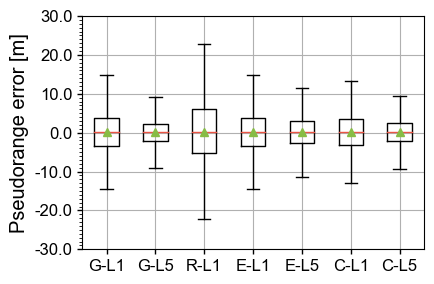

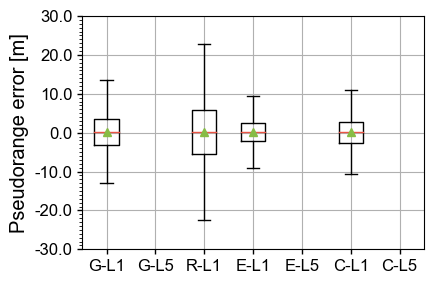

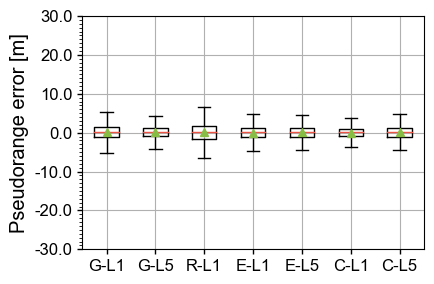

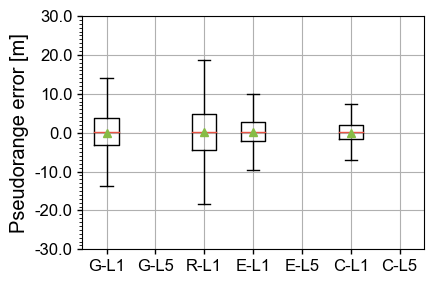

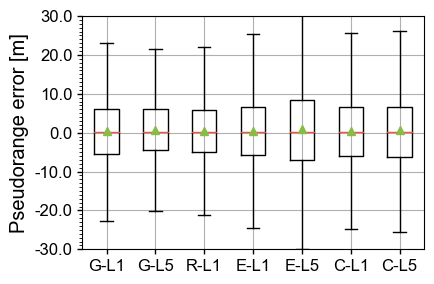

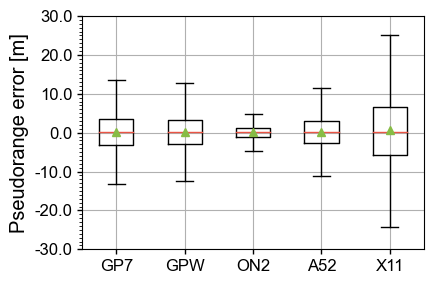

In [22]:

plotStatisticsDataBox(_logs, 
                      'PseudorangeAcceleration', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,10], save=f"{output}/s4_pseudo")


In [23]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'pseudorange_error', 300)
    stats.append(log.ref.df['pseudorange_error'].describe(percentiles=[0.5, .667, .95, .997]))
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 6423 (7.762% -    92.24%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,76327.0,0.011696,26.507429,-299.909,0.075,0.122,0.9407,212.964156,299.144
Pixel Watch,76327.0,0.011696,26.507429,-299.909,0.075,0.122,0.9407,212.964156,299.144
Nord 2,76327.0,0.011696,26.507429,-299.909,0.075,0.122,0.9407,212.964156,299.144
A52,76327.0,0.011696,26.507429,-299.909,0.075,0.122,0.9407,212.964156,299.144
11T,76327.0,0.011696,26.507429,-299.909,0.075,0.122,0.9407,212.964156,299.144


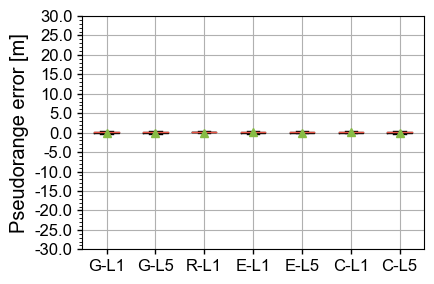

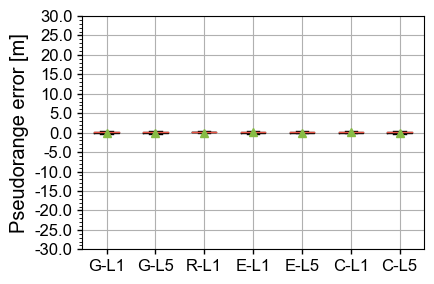

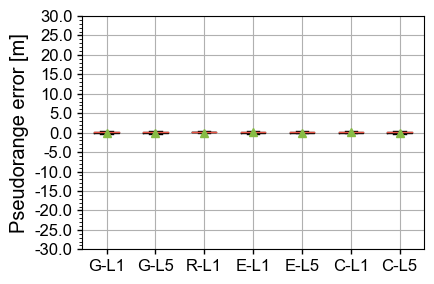

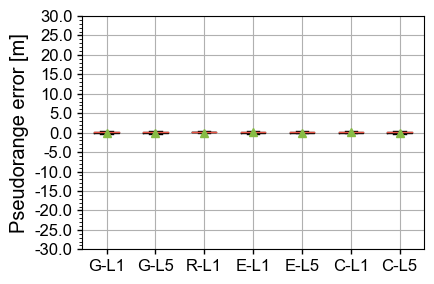

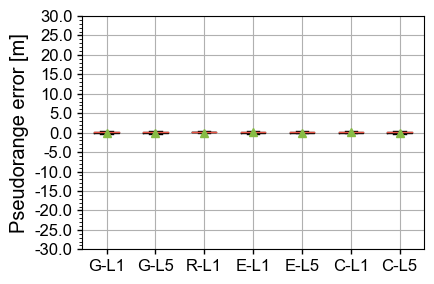

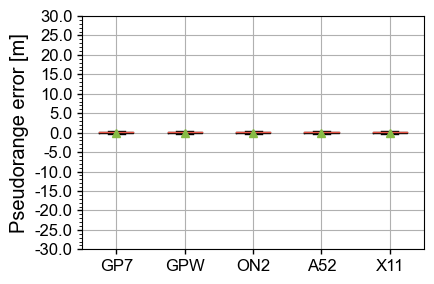

In [24]:

plotStatisticsDataBox(_logs, 
                      'pseudorange_error', 
                      'Pseudorange error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=30,
                      ticks=[1,5],
                      mode='ref')


In [25]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw[list(misc.GnssState_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['State'], bits=17, type='tracking'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssState_Str.values())].count()
    stats.append(log.raw[list(misc.GnssState_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

,Pixel 7,Pixel Watch,Nord 2,A52,11T
TRACK_UNKNOWN,0.000000,0.000000,0.000000,0.000000,0.000000
TRACK_CODE_LOCK,0.809970,0.674565,1.000000,1.000000,1.000000
TRACK_BIT_SYNC,0.856288,0.852162,0.678628,0.999846,0.672381
TRACK_SUBFRAME_SYNC,0.475176,0.444791,0.548599,0.999846,0.545159
TRACK_TOW_DECODED,0.336321,0.450928,0.856396,0.999846,0.856181
TRACK_MSEC_AMBIGUOUS,0.017926,0.006562,0.013575,0.000000,0.016597
TRACK_SYMBOL_SYNC,0.858041,0.852729,0.678628,0.000000,0.672381
TRACK_GLO_STRING_SYNC,0.149220,0.202568,0.130029,0.212146,0.127222
TRACK_GLO_TOD_DECODED,0.142961,0.144575,0.130029,0.212146,0.127222
TRACK_BDS_D2_BIT_SYNC,0.000000,0.000000,0.000000,0.000000,0.000000


Doppler

In [26]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    log.raw = misc.filterValues(log.raw, 'DopplerError', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.raw['DopplerError'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


Rows removed 34   (0.085% -    99.91%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,max
Pixel 7,39850.0,0.084613,0.610256,-19.214155,0.076430,29.231184
Pixel Watch,28155.0,0.088161,0.394566,-6.177002,0.083843,6.730058
Nord 2,59224.0,0.055051,0.958040,-21.950684,0.074084,22.329557
A52,19453.0,0.077279,0.755144,-8.660982,0.073792,6.298895
11T,58425.0,0.064122,0.845841,-18.460600,0.135597,25.563496


In [27]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &  mean &   std &     min &   50\% &    max \\
\midrule
39850.000 & 0.085 & 0.610 & -19.214 & 0.076 & 29.231 \\
28155.000 & 0.088 & 0.395 &  -6.177 & 0.084 &  6.730 \\
59224.000 & 0.055 & 0.958 & -21.951 & 0.074 & 22.330 \\
19453.000 & 0.077 & 0.755 &  -8.661 & 0.074 &  6.299 \\
58425.000 & 0.064 & 0.846 & -18.461 & 0.136 & 25.563 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


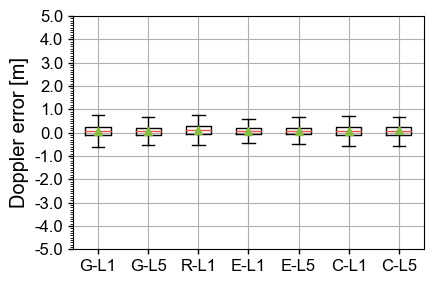

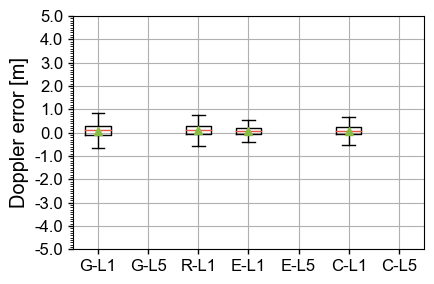

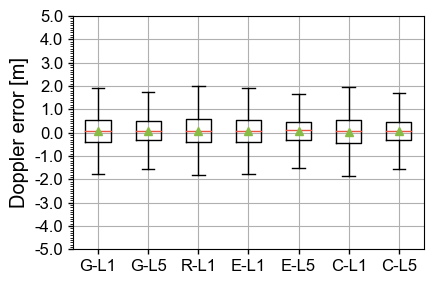

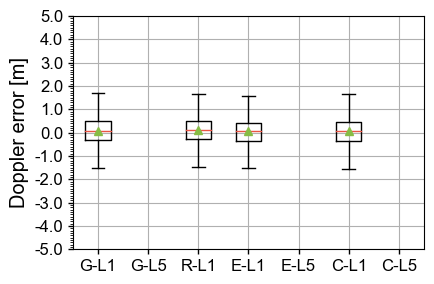

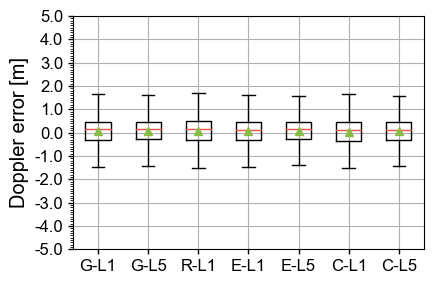

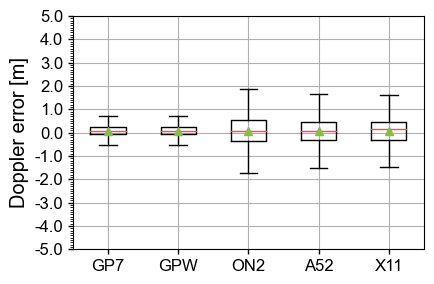

In [28]:

plotStatisticsDataBox(_logs, 
                      'DopplerError', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=5,
                      ticks=[0.1,1], save=f"{output}/s4_doppler")

In [29]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'doppler_error', 30)
    #log.raw = misc.filterPercentile(log.raw, 'DopplerError', 0.997)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
    stats.append(log.ref.df['doppler_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats


--- Pixel 7 ---
Rows removed 46   (0.056% -    99.94%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,82776.0,-0.439345,1.865651,-29.092,-0.344,0.029,1.994,6.7805,16.803
Pixel Watch,82776.0,-0.439345,1.865651,-29.092,-0.344,0.029,1.994,6.7805,16.803
Nord 2,82776.0,-0.439345,1.865651,-29.092,-0.344,0.029,1.994,6.7805,16.803
A52,82776.0,-0.439345,1.865651,-29.092,-0.344,0.029,1.994,6.7805,16.803
11T,82776.0,-0.439345,1.865651,-29.092,-0.344,0.029,1.994,6.7805,16.803


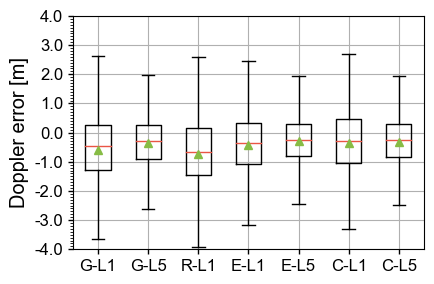

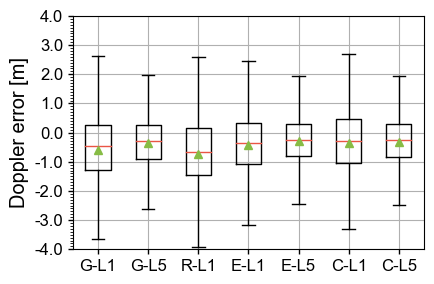

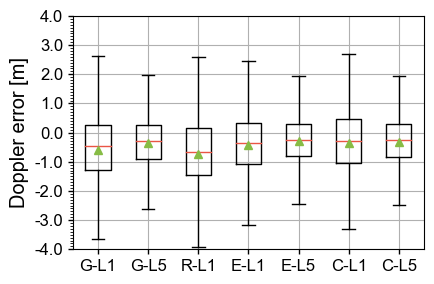

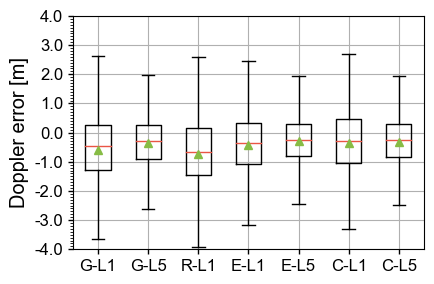

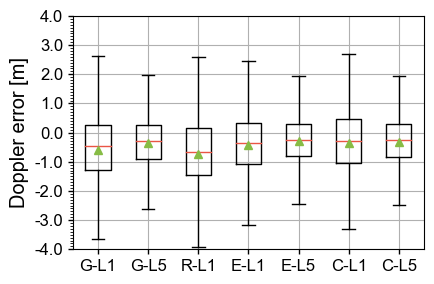

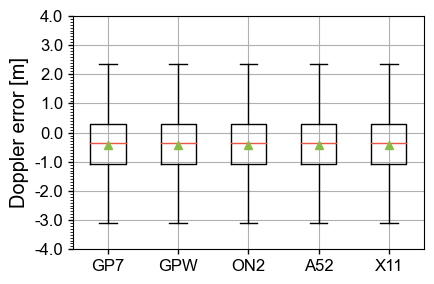

In [30]:

plotStatisticsDataBox(_logs, 
                      'doppler_error', 
                      'Doppler error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.1, 1],
                      mode='ref')

Phases

In [31]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    #log.raw = misc.filterPercentile(log.raw, 'PhaseError', 0.997)
    log.raw = misc.filterValues(log.raw, 'PhaseError', 30)
    stats.append(log.raw['PhaseError'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

Rows removed 411  (1.032% -    98.97%)
Rows removed 30   (0.107% -    99.89%)
Rows removed 638  (1.079% -    98.92%)
Rows removed 0    (0.000% -   100.00%)
Rows removed 526  (0.902% -    99.10%)


,count,mean,std,min,50%,max
Pixel 7,39416.0,0.090337,1.126679,-29.219212,0.077275,29.974514
Pixel Watch,28087.0,0.109529,0.895086,-22.652513,0.086274,27.965991
Nord 2,58508.0,0.065246,0.888080,-29.928948,0.088521,28.932139
A52,19410.0,0.000000,0.000000,0.000000,0.000000,0.000000
11T,57820.0,0.079404,0.931443,-29.506944,0.162484,29.919131


In [32]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))

\begin{tabular}{rrrrrr}
\toprule
    count &  mean &   std &     min &   50\% &    max \\
\midrule
39416.000 & 0.090 & 1.127 & -29.219 & 0.077 & 29.975 \\
28087.000 & 0.110 & 0.895 & -22.653 & 0.086 & 27.966 \\
58508.000 & 0.065 & 0.888 & -29.929 & 0.089 & 28.932 \\
19410.000 & 0.000 & 0.000 &   0.000 & 0.000 &  0.000 \\
57820.000 & 0.079 & 0.931 & -29.507 & 0.162 & 29.919 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/3026797437.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.3f}".format))


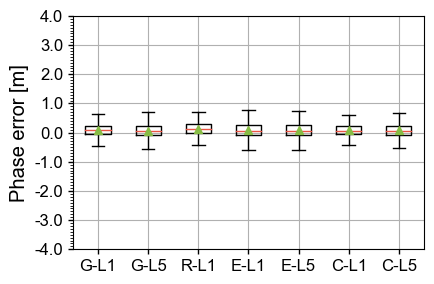

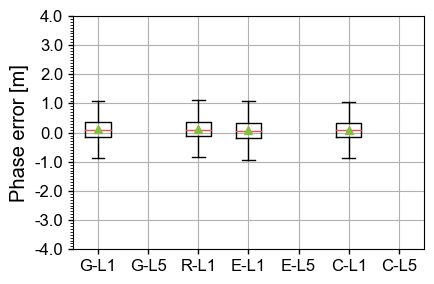

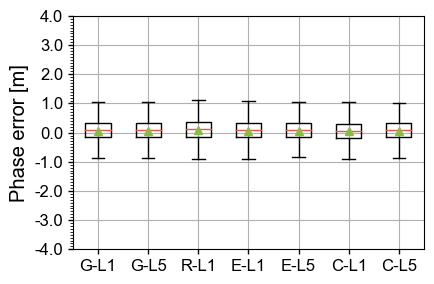

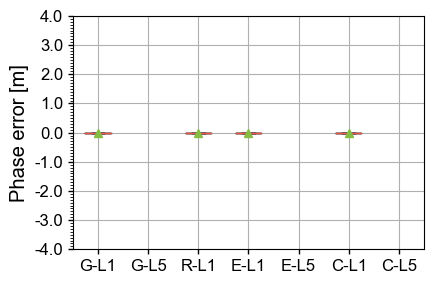

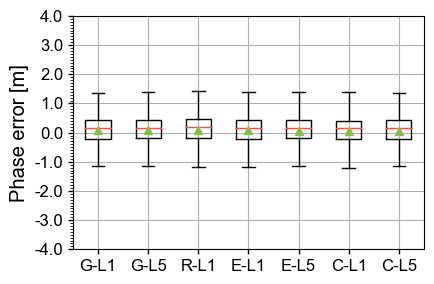

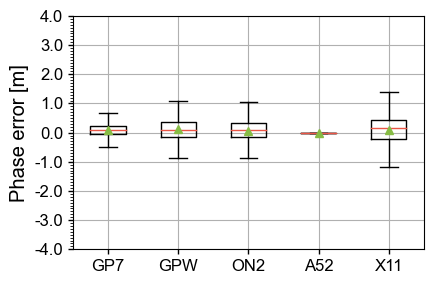

In [33]:

plotStatisticsDataBox(_logs, 
                      'PhaseError', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=4,
                      ticks=[0.1,1], save=f"{output}/s4_phase")
    

In [34]:
_logs = copy.deepcopy(logs)
stats = []
for log in _logs:
    print(f"--- {log.device} ---")
    log.ref.df = misc.filterValues(log.ref.df, 'phase_error', 500)
    stats.append(log.ref.df['phase_error'].describe(percentiles=[0.5, .667, .95, .997]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

--- Pixel 7 ---
Rows removed 7679 (9.280% -    90.72%)
--- Pixel Watch ---
Rows removed 0    (0.000% -   100.00%)
--- Nord 2 ---
Rows removed 0    (0.000% -   100.00%)
--- A52 ---
Rows removed 0    (0.000% -   100.00%)
--- 11T ---
Rows removed 0    (0.000% -   100.00%)


,count,mean,std,min,50%,66.7%,95%,99.7%,max
Pixel 7,75071.0,0.361024,32.472517,-499.551,0.341,0.528,1.6125,255.38775,499.937
Pixel Watch,75071.0,0.361024,32.472517,-499.551,0.341,0.528,1.6125,255.38775,499.937
Nord 2,75071.0,0.361024,32.472517,-499.551,0.341,0.528,1.6125,255.38775,499.937
A52,75071.0,0.361024,32.472517,-499.551,0.341,0.528,1.6125,255.38775,499.937
11T,75071.0,0.361024,32.472517,-499.551,0.341,0.528,1.6125,255.38775,499.937


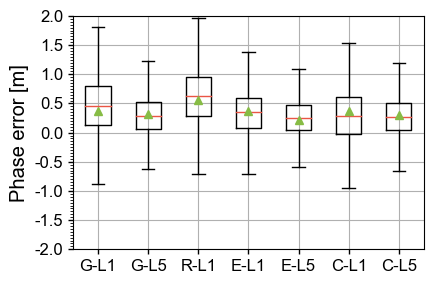

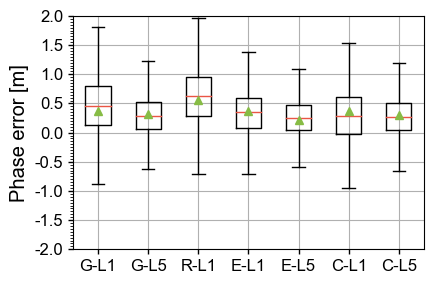

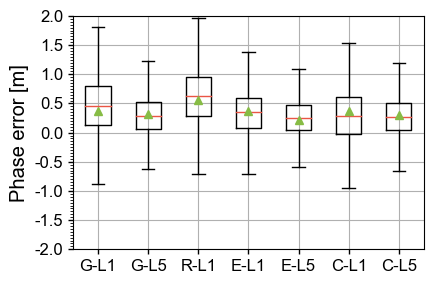

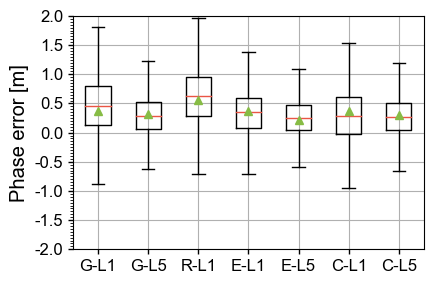

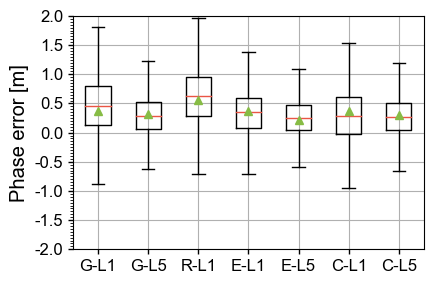

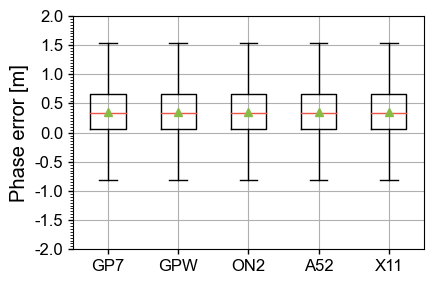

In [35]:

plotStatisticsDataBox(_logs, 
                      'phase_error', 
                      'Phase error [m]', 
                      ('G', 'R', 'E', 'C'), 
                      ('L1', 'L5'),
                      lim=2,
                      ticks=[0.05,0.5],
                      mode='ref')

In [36]:
stats = []
_logs = copy.deepcopy(logs)
for log in _logs:
    log.raw[list(misc.GnssStateADR_Str.values())] = log.raw.apply(lambda row: misc.getSplitState(row['AccumulatedDeltaRangeState'], bits=5, type='phase'), axis='columns', result_type='expand')
    count = log.raw[list(misc.GnssStateADR_Str.values())].count()
    stats.append(log.raw[list(misc.GnssStateADR_Str.values())].sum().div(count))
stats = pd.concat(stats, keys=device_list, axis=1)
stats

,Pixel 7,Pixel Watch,Nord 2,A52,11T
ADR_UNKNOWN,0.000000,0.000000,0.000000,0.0,0.000000
ADR_VALID,0.391753,0.135566,0.597922,0.0,0.647289
ADR_RESET,0.000025,0.000000,0.000000,0.0,0.000000
ADR_CYCLE_SLIP,0.027140,0.031355,0.297342,0.0,0.310372
ADR_HALF_CYCLE_RESOLVED,0.315440,0.071223,0.345536,0.0,0.383478
ADR_HALF_CYCLE_REPORTED,1.000000,1.000000,1.000000,1.0,1.000000


C/N0

In [37]:
_logs = copy.deepcopy(logs)
stats= []
for log in _logs:
    stats.append(log.raw['Cn0DbHz'].describe(percentiles=[0.5]).T)
stats = pd.concat(stats, keys=device_list, axis=1).T
stats

,count,mean,std,min,50%,max
Pixel 7,39941.0,33.805506,7.445155,10.6,34.444431,52.711540
Pixel Watch,28193.0,27.765190,6.720307,12.1,28.777302,45.349087
Nord 2,59302.0,25.572597,10.506596,0.0,27.555000,48.799999
A52,19496.0,42.483007,6.069765,19.3,42.900000,58.700000
11T,58504.0,29.186400,7.067641,5.0,29.323000,47.792000


In [38]:
print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))

\begin{tabular}{rrrrrr}
\toprule
  count &  mean &  std &  min &  50\% &  max \\
\midrule
39941.0 &  33.8 &  7.4 & 10.6 & 34.4 & 52.7 \\
28193.0 &  27.8 &  6.7 & 12.1 & 28.8 & 45.3 \\
59302.0 &  25.6 & 10.5 &  0.0 & 27.6 & 48.8 \\
19496.0 &  42.5 &  6.1 & 19.3 & 42.9 & 58.7 \\
58504.0 &  29.2 &  7.1 &  5.0 & 29.3 & 47.8 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_7687/2174737608.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(stats.to_latex(index=False, formatters={"name": str.upper}, float_format="{:.1f}".format))


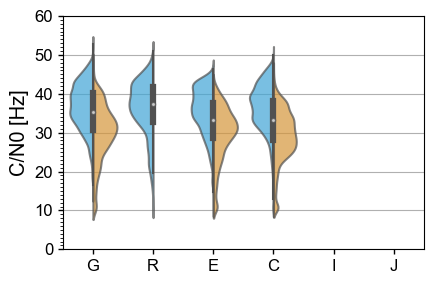

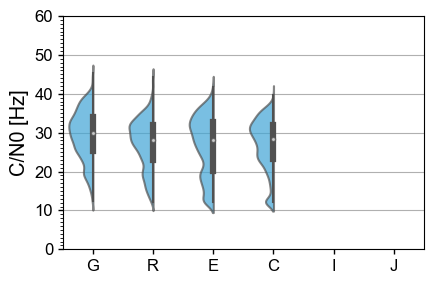

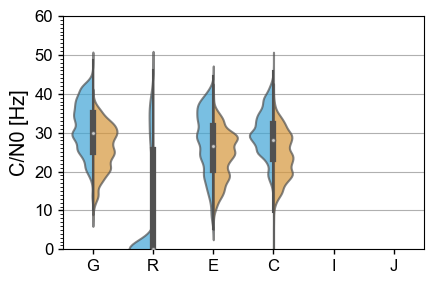

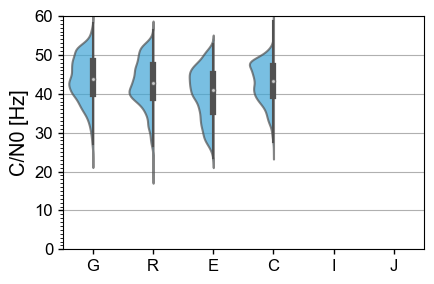

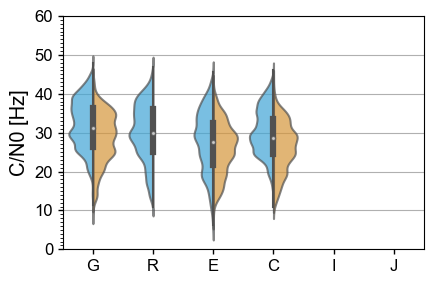

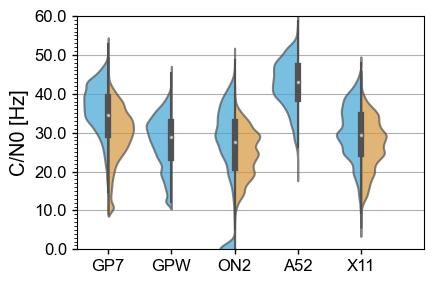

In [39]:
_logs = copy.deepcopy(logs)
plotStatisticsDataViolin(
    _logs, 
    'Cn0DbHz', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10], save=f"{output}/s4_cn0")

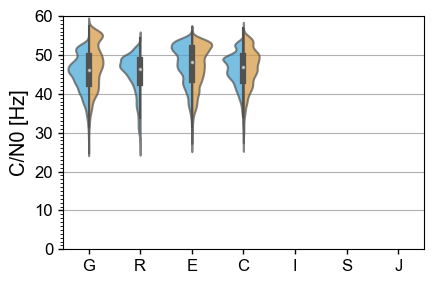

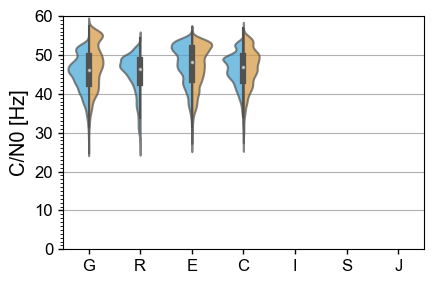

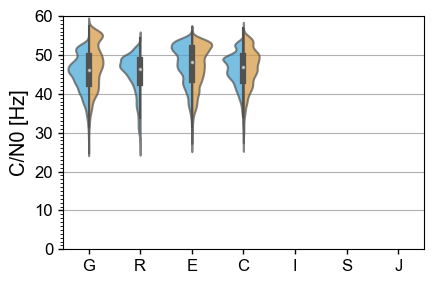

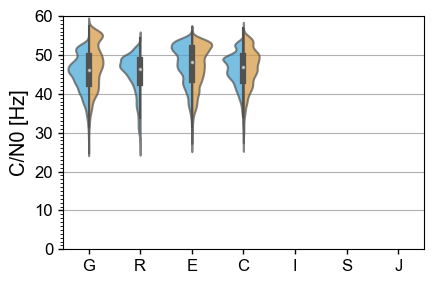

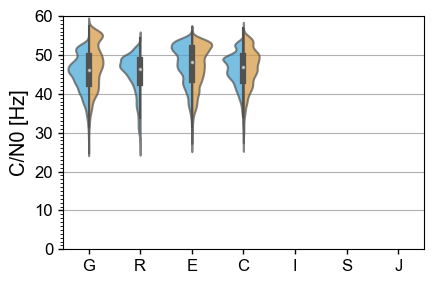

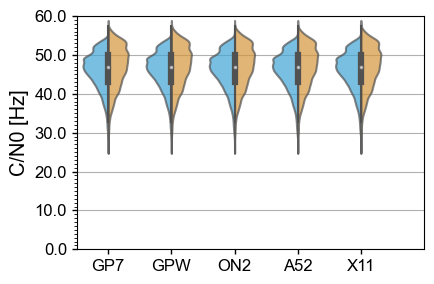

In [40]:
plotStatisticsDataViolin(
    _logs, 
    'snr', 
    'C/N0 [Hz]', 
    ('G', 'R', 'E', 'C', 'I', 'S', 'J'), 
    ('L1', 'L5'),
    lim=60,
    ticks=[1,10],
    mode='ref')